# LAB -4

## A Amar Rohith
## EC21B1106

1.	In this question,  you will explore the concept of Mahalanobis distance and its application to classifying samples from the Iris dataset. The Iris dataset is a commonly used dataset in machine learning and consists of three classes of iris plants: Setosa, Versicolor, and Virginica. You will compute the Mahalanobis distance for one sample from each class and classify the samples based on their Mahalanobis distance.

Tasks:
●	Load the Iris dataset (csv file present in the classroom).
●	Choose one random sample from each class (Setosa, Versicolor, and Virginica) which will act as the test data.
●	Compute the mean vector and covariance matrix for each class (without the sample picked in the previous part, now it will act as the test data).
●	Calculate the Mahalanobis distance for each of the selected samples with each of the class using the formula:
Mahalanobis distance = sqrt((x - μ)ᵀ * Σ⁻¹ * (x - μ))
Where:
x is the feature vector of the sample.
μ is the mean vector for each class.
Σ⁻¹ is the inverse of the covariance matrix for each class.

●	Compare the Mahalanobis distances for the three samples and classify each sample to the class with the smallest Mahalanobis distance.
●	Print the original class and the predicted class for each sample, along with their Mahalanobis distances.


In [58]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

def mycovariance_matrix(data):
    data = np.array(data)
    num_samples, num_variables = data.shape
    means = np.mean(data, axis=0)
    centered_data = data - means
    cov_matrix = np.dot(centered_data.T, centered_data) / (num_samples - 1)
    return cov_matrix

def mahalanobis_distance(sample, mean_vector, cov_matrix):
   inv_cov_matrix = np.linalg.inv(cov_matrix)
   sample = np.array(sample)
   mean_vector = np.array(mean_vector)
   diff = sample - mean_vector
   distance = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
   return distance

def calculate_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = sum((x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x, y))
    x_squared_sum = sum((x_i - x_mean)**2 for x_i in x)
    y_squared_sum = sum((y_i - y_mean)**2 for y_i in y)
    denominator = (np.sqrt(x_squared_sum) * np.sqrt(y_squared_sum))
    return numerator / denominator

def kl(H1, H2):
    kl_div = 0
    for i in range(len(H1)):
        if H1[i] != 0 and H2[i] != 0:
            kl_div += H1[i] * np.log(H1[i] / H2[i])
    return kl_div

def bhattacharyya_distance(H1, H2):
    bc = 0
    for i in range(len(H1)):
        bc += np.sqrt(H1[i] * H2[i])
    return -np.log(bc)

def read_file(filename):
    with open(filename, 'r') as file:
        return file.read()

def create_vector(text, vocabulary):
    vector = [0] * len(vocabulary)
    words = text.lower().split()
    for word in words:
        if word in vocabulary:
            vector[vocabulary[word]] += 1
    return vector


In [3]:
df=pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
min_value=df.groupby('variety').count().min(axis=None)
dice=np.random.randint(0,min_value)
sample_list=df.groupby('variety').nth(dice)
sample_list.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
46,5.1,3.8,1.6,0.2,Setosa
96,5.7,2.9,4.2,1.3,Versicolor
146,6.3,2.5,5.0,1.9,Virginica


In [23]:
test_index=sample_list.index.to_list()
test_data=df.loc[df.index.isin(test_index)]
train_data=df.loc[~df.index.isin(test_index)]
train_data.head()
test_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
46,5.1,3.8,1.6,0.2,Setosa
96,5.7,2.9,4.2,1.3,Versicolor
146,6.3,2.5,5.0,1.9,Virginica


In [24]:
class_unique=train_data['variety'].unique()
print(class_unique)
mean_vectors={}
cov_matrices={}
for varieties in class_unique:
   
    dframe=train_data[train_data['variety']==varieties].drop(columns='variety')
    mean_vector=dframe.mean().values
    mean_vectors[varieties]=mean_vector

    covarience_matrix=mycovariance_matrix(dframe.values)
    #covarience_matrix=np.cov(dframe.values.T)
    cov_matrices[varieties]=covarience_matrix
print(f"mean_vectors={mean_vectors}")
print(f"covariance Matrices={cov_matrices}")
    

['Setosa' 'Versicolor' 'Virginica']
mean_vectors={'Setosa': array([5.00408163, 3.42040816, 1.45918367, 0.24693878]), 'Versicolor': array([5.94081633, 2.76734694, 4.26122449, 1.32653061]), 'Virginica': array([6.59387755, 2.98367347, 5.56326531, 2.02857143])}
covariance Matrices={'Setosa': array([[0.12664966, 0.10053997, 0.01642007, 0.01063776],
       [0.10053997, 0.1437415 , 0.01085034, 0.00985544],
       [0.01642007, 0.01085034, 0.03038265, 0.00633078],
       [0.01063776, 0.00985544, 0.00633078, 0.01129252]]), 'Versicolor': array([[0.27079932, 0.08761054, 0.18640731, 0.05681122],
       [0.08761054, 0.10016156, 0.08454082, 0.04213435],
       [0.18640731, 0.08454082, 0.22534014, 0.07459184],
       [0.05681122, 0.04213435, 0.07459184, 0.03990646]]), 'Virginica': array([[0.4110034 , 0.09281463, 0.30622874, 0.04934524],
       [0.09281463, 0.10139456, 0.06730442, 0.04735119],
       [0.30622874, 0.06730442, 0.30445578, 0.0483631 ],
       [0.04934524, 0.04735119, 0.0483631 , 0.0766666

In [31]:
for _,test in test_data.iterrows():
    distance={}
    original_class=test['variety']
    test=test.drop('variety').values
    for varieties in class_unique:
        distance[varieties]=mahalanobis_distance(test, mean_vectors[varieties], cov_matrices[varieties])
    predicted_class=min(distance,key=lambda x:distance[x])
    
    print(f"predicted class={predicted_class},original class={original_class}")
    
        

predicted class=Setosa,original class=Setosa
predicted class=Versicolor,original class=Versicolor
predicted class=Virginica,original class=Virginica


2.	  You are conducting a study to explore the relationships between various factors and their potential correlation with the test scores of a group of individuals. You have gathered data from a group of individuals, and the table below represents the hours spent on different activities, along with their corresponding test scores. Your task is to analyze the data and determine the type of correlation, if any, between each variable and the test scores, without using built-in functions for calculating correlation.

In [41]:
data = {
    'Hours Studied': [2, 3, 4, 5, 6, 7],
    'Hours Watching TV': [4, 3, 2, 1, 0, 0],
    'Outdoor Activity Time': [2, 4, 6, 8, 10, 12],
    'Hours Listening to Music': [2, 3, 4, 1, 5, 0],
    'Water Consumed': [5, 6, 5, 6, 4, 5],
    'Test Score': [65, 70, 75, 80, 85, 90]
}
df=pd.DataFrame(data)
df.head()
target_variable=df["Test Score"]
variables=['Hours Studied', 'Hours Watching TV', 'Outdoor Activity Time', 'Hours Listening to Music', 'Water Consumed']
for feature in variables:
    corr=calculate_correlation(data[feature], data["Test Score"])
    print(f"correlation between {feature} and test score is : {corr}")

correlation between Hours Studied and test score is : 1.0
correlation between Hours Watching TV and test score is : -0.9819805060619656
correlation between Outdoor Activity Time and test score is : 1.0
correlation between Hours Listening to Music and test score is : -0.2
correlation between Water Consumed and test score is : -0.35503580124836315


3.	Consider the following images. Obtain the histograms for each of the images. Using a suitable distance measure (Bhattacharyya Distance) , find the distance between the query image and reference images. You can use the inbuilt function to calculate the Bhattacharyya Distance between two histograms, check classroom post for more information.

Bhattacharyya Distance (Query vs Ref Image 1): 0.194471668817361
Bhattacharyya Distance (Query vs Ref Image 2): 0.6472626387546532


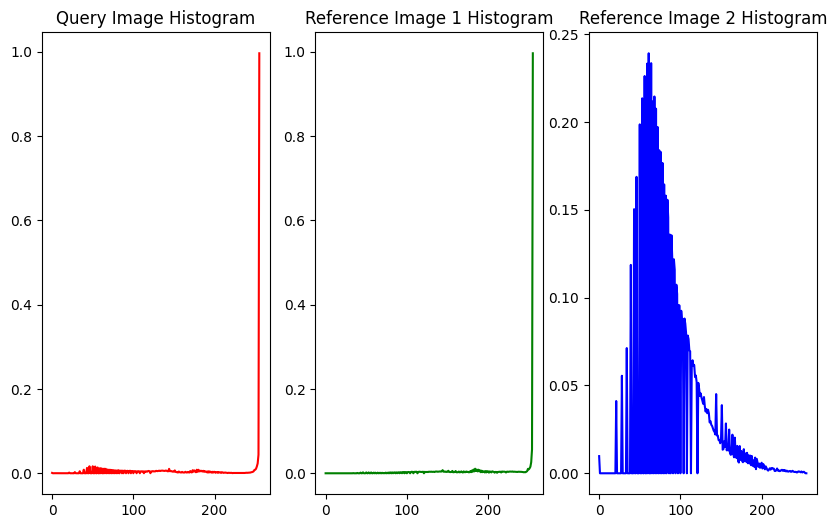

In [48]:
query_image=cv2.imread('queryimage.png',cv2.IMREAD_GRAYSCALE)
ref_image_1=cv2.imread('refimage1.png',cv2.IMREAD_GRAYSCALE)
ref_image_2=cv2.imread('refimage2.png',cv2.IMREAD_GRAYSCALE)
hist_query = cv2.calcHist([query_image], [0], None, [256], [0, 256])
hist_ref_1 = cv2.calcHist([ref_image_1], [0], None, [256], [0, 256])
hist_ref_2 = cv2.calcHist([ref_image_2], [0], None, [256], [0, 256])
hist_query = cv2.normalize(hist_query, hist_query).flatten()
hist_ref_1 = cv2.normalize(hist_ref_1, hist_ref_1).flatten()
hist_ref_2 = cv2.normalize(hist_ref_2, hist_ref_2).flatten()
dist_ref_1 = cv2.compareHist(hist_query, hist_ref_1, cv2.HISTCMP_BHATTACHARYYA)
dist_ref_2 = cv2.compareHist(hist_query, hist_ref_2, cv2.HISTCMP_BHATTACHARYYA)

print(f"Bhattacharyya Distance (Query vs Ref Image 1): {dist_ref_1}")
print(f"Bhattacharyya Distance (Query vs Ref Image 2): {dist_ref_2}")

plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.title("Query Image Histogram")
plt.plot(hist_query, color='r')

plt.subplot(1, 3, 2)
plt.title("Reference Image 1 Histogram")
plt.plot(hist_ref_1, color='g')

plt.subplot(1, 3, 3)
plt.title("Reference Image 2 Histogram")
plt.plot(hist_ref_2, color='b')


plt.show()


## Part B

1.	Calculate the distance between the two normalized histograms H1 and H2 using each of the following methods:
(a) KL Distance
(b) Bhattacharyya Distance
H1 = [ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]
H2 = [ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]


In [51]:
H1 = np.array([0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04])
H2 = np.array([0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02])
kl_distance = kl(H1, H2)
bhatt_distance = bhattacharyya_distance(H1, H2)
print(f"KL Divergence: {kl_distance}")
print(f"Bhattacharyya Distance: {bhatt_distance}")



KL Divergence: 0.06290516707464021
Bhattacharyya Distance: 0.014830056106628874


2.	Compare two text files doc1.txt and doc2.txt using cosine distance.


In [60]:
doc1 = read_file('doc1.txt')
doc2 = read_file('doc2.txt')


vocabulary = {}
for word in (doc1 + " " + doc2).lower().split():
    if word not in vocabulary:
        vocabulary[word] = len(vocabulary)


vec1 = create_vector(doc1, vocabulary)
vec2 = create_vector(doc2, vocabulary)


dot_product = sum(a * b for a, b in zip(vec1, vec2))


magnitude_a = math.sqrt(sum(a ** 2 for a in vec1))
magnitude_b = math.sqrt(sum(b ** 2 for b in vec2))


if magnitude_a == 0 or magnitude_b == 0:
    cosine_similarity = 0.0
else:
    cosine_similarity = dot_product / (magnitude_a * magnitude_b)


cosine_distance = 1 - cosine_similarity


print(f"Cosine Distance: {cosine_distance}")

Cosine Distance: 0.6938137821521027
